# Disater Tweets with Tensorflow

In [1]:
import pandas as pd
import numpy as np

In [2]:
Train = pd.read_csv('train.csv')  

In [3]:
Train.head()

id              keyword location  \
0  10810              wrecked        6   
1   1297               bloody       65   
2    237  airplane%20accident       92   
3   2785               curfew      253   
4    953                blaze      302   

                                                text  target  
0                      @Tunes_WGG lol. U got wrecked       0  
1  @zhenghxn i tried 11 eyes akame ga kill and to...       0  
2  #OMG! I don't believe this. #RIP bro\n#AirPlan...       1  
3  @stupid_niggr I'm telling your mom your up pas...       0  
4            Yo I got bars and I'm not even a rapper       0

## EDA

Find where is the most tweet occur. 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

### 0. Clean

In [5]:
import re
emoji = re.compile("["
                   u"\U0001F600-\U0001F64F"  #Emoticons
                   u"\U0001F300-\U0001F5FF"  #Symbols & pictographs
                   u"\U0001F680-\U0001F6FF"  #Transport & map symbols
                   u"\U0001F1E0-\U0001F1FF"  #Flags (iOS)
                   u"\U00002500-\U00002BEF"  #Chinese char
                   u"\U00002702-\U000027B0"
                   u"\U00002702-\U000027B0"
                   u"\U000024C2-\U0001F251"
                   u"\U0001f926-\U0001f937"
                   u"\U00010000-\U0010ffff"
                   u"\u2640-\u2642"
                   u"\u2600-\u2B55"
                   u"\u200d"
                   u"\u23cf"
                   u"\u23e9"
                   u"\u231a"
                   u"\ufe0f"  #Dingbats
                   u"\u3030"
                   "]+", flags = re.UNICODE) #Flag option as Unicode

def cleanText(text):
    whitespace = re.compile(r"\s+")
    web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
    web_address = re.compile(r"(?:http|ftp|https)://(?:[\w-]+(?:(?:.[\w-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    # user = re.compile(r"@([a-zA-Z0-9_]{1,50})")
    text = whitespace.sub(' ', text)
    text = web_address.sub('', text)
    text = user.sub('', text)
    text = re.sub(r"\[[^()]*\]", "", text)
    text = re.sub("\d+", "", text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r"(?:@\S*|#\S*|http(?=.*://)\S*)", "", text)
    text = re.sub(r'http\S+', '', text)   #this remove url
    return text.lower()

### 1. Disater vs non-disater

In [6]:
count_disater = Train.groupby('target').count()['id'].reset_index()
count_disater

target    id
0       0  4342
1       1  3271

<AxesSubplot:xlabel='target', ylabel='id'>

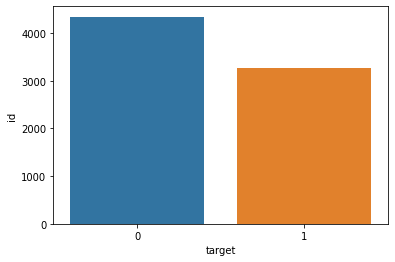

In [7]:
sns.barplot(data = count_disater,x='target',y='id')

### 2. Location count

In [8]:
list_country = open('ALL_country.txt').read().split('\n')

In [9]:
# This is a bad example of location occur. 
# count_country = []
# Train['location'].dropna()
# location = Train['location'].value_counts()

In [10]:
location = np.array(Train['location'].dropna()).astype(str)
location

array(['6', '65', '92', ..., 'Zero Branco', 'Ziam af ', 'Zimbabwe'],
      dtype='<U49')

In [ ]:
count_country = []
for i in location:
    text_1 = re.split(' ', i)
    text_2 = re.split(',', i)
    for j in range(len(text_1)):
        for l in list_country:
            if l == text_1[j]:
                count_country.append(l)
                break
            # print('j=',j,text_1[j])
    for k in range(len(text_2)):
        for l in list_country:
            if l == text_2[k]:
                count_country.append(l)
                break
# count_country

In [12]:
count_location_df = pd.DataFrame(count_country)
count_location_df.rename(columns={0:'country'},inplace=True)
count_location_df.head()


country
0  Australia
1         AR
2  Australia
3  Australia
4         SE

In [13]:
top10_location = count_location_df.value_counts().reset_index()
top10_location.rename(columns={0:'counts'},inplace=True)
# top10_location.replace({'CA':'Canada','NC':'New Caledonia','IL':'Israel','PA':'Panama','GA':'Gabon'},inplace=True) # I found USA people like to represent their state it was a country.
top10_location = top10_location[:10]

In [14]:
top10_location

country  counts
0            USA     357
1             CA     144
2         Canada     108
3        Nigeria      83
4      Australia      74
5          India      64
6  United States      50
7          Kenya      46
8             NC      46
9             IL      42

Substitute abbreviate:

*Note that: <br>
NC = North Carolina = USA <br>
            IL = Illinois = USA <br>
            United States = USA

In [15]:
top10_location.replace({'CA':'Canada','NC':'United States','IL':'United States','USA':'United States'},inplace=True)

In [16]:
top10_location= top10_location.groupby('country').sum().counts.reset_index()
top10_location = top10_location.sort_values('counts',ascending=False)

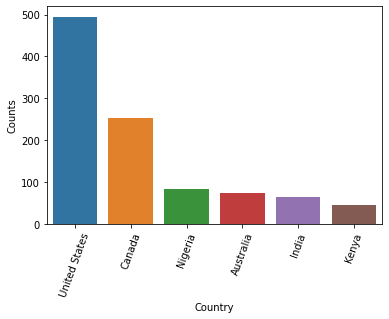

In [19]:
sns.barplot(data = top10_location, x='country', y='counts')
plt.xticks(rotation=70)
plt.ylabel('Counts')
plt.xlabel('Country')
plt.show()

### 3. Map location

In [20]:
import plotly.express as px

In [21]:
#replace country with Alpha3 code
top10_location.replace({'Canada':'CAN','United States':'USA','Nigeria':'NGA','Australia':'AUS','India':'IND','Kenya':'KEN'},inplace=True)
top10_location

country  counts
5     USA     495
1     CAN     252
4     NGA      83
0     AUS      74
2     IND      64
3     KEN      46

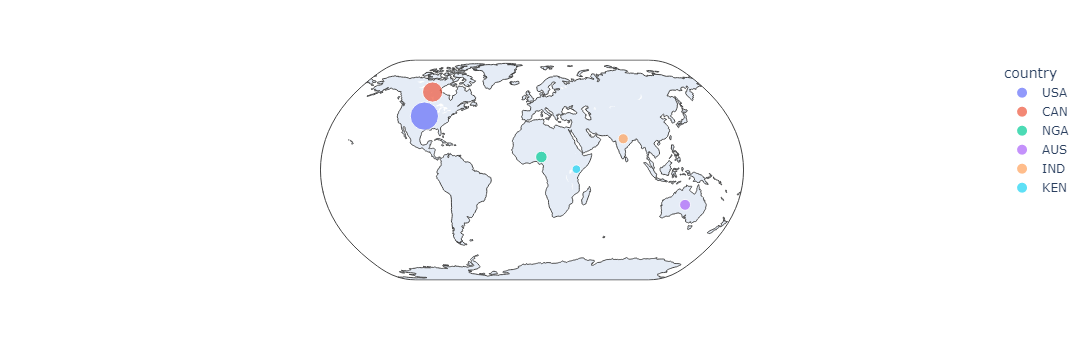

In [22]:
fig = px.scatter_geo(top10_location, locations='country', color='country',
                     hover_name="country", size='counts',
                     projection="natural earth")
fig.show()

### 4. Word cloud

In [ ]:
# !pip install nltk
# !pip install wordcloud


In [23]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
# import nltk
# nltk.download('stopwords')

In [24]:
Train['text'] = Train['text'].astype('string')

In [25]:
stop_words= set(stopwords.words("english"))

stop_words.update(['https', 'http', 'amp', 'CO', 't', 'u', 'new', "I'm", "would"])

wc = WordCloud(width=800,
               height=400,
               max_words=200,
               stopwords=stop_words,
               background_color='white',
               max_font_size=150)

In [26]:
disaster_tweets_text = Train.query("target==1").text
concat_disaster_tweets_text = disaster_tweets_text.str.cat(sep=" ")

non_disaster_tweets_text = Train.query("target==0").text
concat_non_disaster_tweets_text = non_disaster_tweets_text.str.cat(sep=" ")



Word Cloud for Non-Disaster Tweets




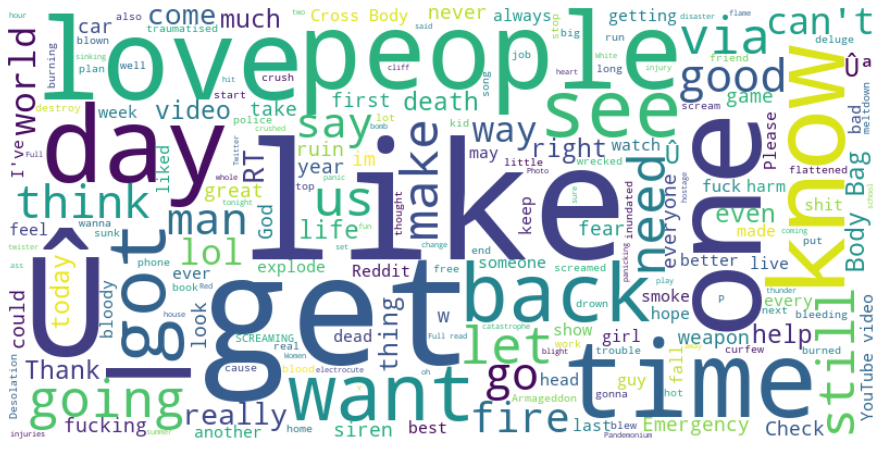

In [27]:
print('\n\nWord Cloud for Non-Disaster Tweets\n\n')
wc.generate(concat_non_disaster_tweets_text)
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()



Word Cloud for Disaster Tweets




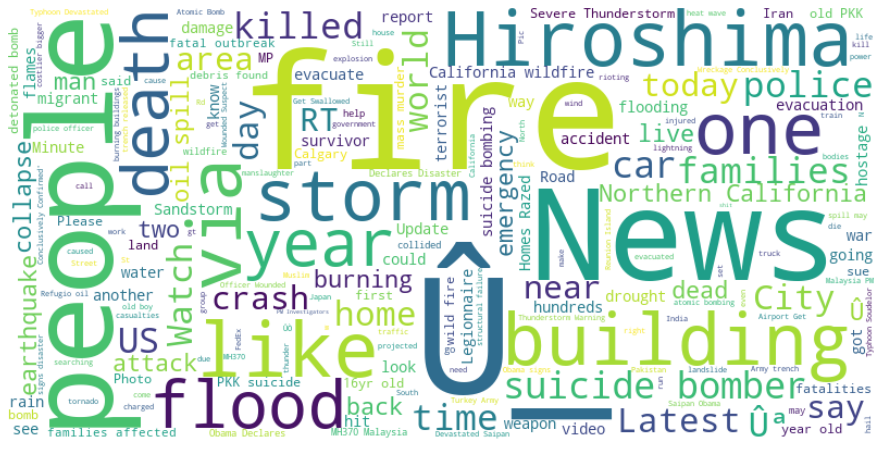

In [28]:
print('\n\nWord Cloud for Disaster Tweets\n\n')
wc.generate(concat_disaster_tweets_text)
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Model and prediction

### 5. data processing

Clean data (remove #, @[ ], url[ ], emoji ):

In [29]:
Train.text = [cleanText(item) for item in Train.text]
Train

id              keyword location  \
0     10810              wrecked        6   
1      1297               bloody       65   
2       237  airplane%20accident       92   
3      2785               curfew      253   
4       953                blaze      302   
...     ...                  ...      ...   
7608  10869                  NaN      NaN   
7609  10870                  NaN      NaN   
7610  10871                  NaN      NaN   
7611  10872                  NaN      NaN   
7612  10873                  NaN      NaN   

                                                   text  target  
0                                     lol u got wrecked       0  
1      i tried  eyes akame ga kill and tokyo ghoul a...       0  
2     omg i dont believe this rip bro airplane accid...       1  
3           im telling your mom your up past curfew oth       0  
4                yo i got bars and im not even a rapper       0  
...                                                 ...     ...  
7608  two giant cranes holding a bridge collapse int...       1  
7609    the out of control wild fires in california ...       1  
7610                          m km s of volcano hawaii        1  
7611  police investigating after an ebike collided w...       1  
7612  the latest more homes razed by northern califo...       1  

[7613 rows x 5 columns]

Spell check:

In [ ]:
# !pip install pyspellchecker

In [30]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [31]:
Train['text'] = Train['text'].astype('string')
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   string
 4   target    7613 non-null   int64 
dtypes: int64(2), object(2), string(1)
memory usage: 297.5+ KB


In [32]:
for i in Train['text']:
    try:
        correct_spellings(i)
    except:
        pass
# print(Train['text'][2])
# correct_spellings(Train['text'][2])

### 6. Model

In [33]:
import tensorflow as tf

Preparing features: 

In [34]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.oov_token = '<oovToken>'
tokenizer.fit_on_texts(Train.text)
vocab = tokenizer.word_index
vocabCount = len(vocab)+1

vocabCount

14859

In [35]:
x_Train = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(Train.text.to_numpy()), padding='pre')
y_Train = Train.target.to_numpy()

x_Train.shape, y_Train.shape

((7613, 31), (7613,))

In [36]:
x_Train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 158, 132,  89, 336])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_Train, y_Train, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5100, 31) (2513, 31) (5100,) (2513,)


In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocabCount+1, output_dim=64, input_length=31))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 31, 64)            951040    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 957,313
Trainable params: 957,313
Non-trainable params: 0
_________________________________________________________________


In [40]:
num_epochs = 10
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
160/160 - 4s - loss: 0.6488 - accuracy: 0.6110 - val_loss: 0.5337 - val_accuracy: 0.7891
Epoch 2/10
160/160 - 2s - loss: 0.3917 - accuracy: 0.8388 - val_loss: 0.4522 - val_accuracy: 0.8058
Epoch 3/10
160/160 - 3s - loss: 0.2388 - accuracy: 0.9084 - val_loss: 0.5065 - val_accuracy: 0.7971
Epoch 4/10
160/160 - 2s - loss: 0.1559 - accuracy: 0.9427 - val_loss: 0.5976 - val_accuracy: 0.7688
Epoch 5/10
160/160 - 2s - loss: 0.1112 - accuracy: 0.9604 - val_loss: 0.7101 - val_accuracy: 0.7437
Epoch 6/10
160/160 - 2s - loss: 0.0897 - accuracy: 0.9673 - val_loss: 0.7405 - val_accuracy: 0.7648
Epoch 7/10
160/160 - 2s - loss: 0.0814 - accuracy: 0.9702 - val_loss: 0.7757 - val_accuracy: 0.7529
Epoch 8/10
160/160 - 2s - loss: 0.0724 - accuracy: 0.9710 - val_loss: 0.7896 - val_accuracy: 0.7612
Epoch 9/10
160/160 - 2s - loss: 0.0664 - accuracy: 0.9763 - val_loss: 0.8370 - val_accuracy: 0.7521
Epoch 10/10
160/160 - 2s - loss: 0.0634 - accuracy: 0.9753 - val_loss: 0.9212 - val_accuracy: 0.7234

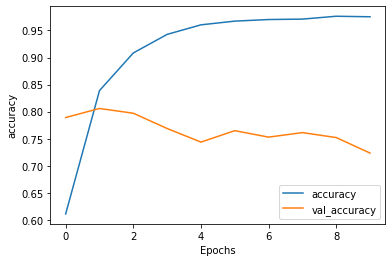

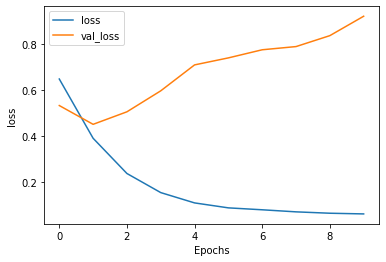

In [41]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### 7. Prediction

In [42]:
predict_df = pd.read_csv('test.csv')

In [43]:
test_data = predict_df['text'].astype('string')

In [44]:
test_data = [cleanText(item) for item in test_data]
test_data[0:5]

['just happened a terrible car crash',
 'heard about earthquake is different cities stay safe everyone',
 'there is a forest fire at spot pond geese are fleeing across the street i cannot save them all',
 'apocalypse lighting spokane wildfires',
 'typhoon soudelor kills  in china and taiwan']

In [ ]:
type(test_data)

In [45]:
x_hat = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(test_data), padding='pre', maxlen=31)

In [ ]:
x_hat.shape

In [62]:
predict = model.predict(x_hat)

In [63]:
predict

array([[0.9844595 ],
       [0.53119755],
       [0.9992312 ],
       ...,
       [0.992514  ],
       [0.99545103],
       [0.9485702 ]], dtype=float32)

In [64]:
predict = predict .reshape(len(predict))
for i in range(len(predict)):
    if predict[i]>0.5:
        predict[i] = 1
    else:
        predict[i] = 0

In [72]:
prediction = pd.DataFrame({'id': predict_df['id'],'text':predict_df['text'], 'target': predict})
prediction.target = prediction.target.astype(int)
prediction.set_index('id')

prediction.to_csv('prediction.csv',index=False)
prediction

id                                               text  target
0         0                 Just happened a terrible car crash       1
1         2  Heard about #earthquake is different cities, s...       1
2         3  there is a forest fire at spot pond, geese are...       1
3         9           Apocalypse lighting. #Spokane #wildfires       1
4        11      Typhoon Soudelor kills 28 in China and Taiwan       1
...     ...                                                ...     ...
3258  10861  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...       1
3259  10865  Storm in RI worse than last hurricane. My city...       1
3260  10868  Green Line derailment in Chicago http://t.co/U...       1
3261  10874  MEG issues Hazardous Weather Outlook (HWO) htt...       1
3262  10875  #CityofCalgary has activated its Municipal Eme...       1

[3263 rows x 3 columns]

In [ ]:
# idCol = predict_df['id'].to_numpy()

# prediction = pd.DataFrame({'id': idCol, 'target': predict})
# prediction.target = prediction.target.astype(int)
# prediction.set_index('id')

In [ ]:
# prediction.to_csv('prediction.csv',index=False)